# HR Analysis Show Case

### Table of Contents:¶
1) Importing the Library
2) Loading the Dataset
3) Check the Null Values using Visualization
4) Exploratory Data Analysis
    * Numerical Value Visualization
        * Pairplot
        * Heatmap
        * Countplot
        * Hist Plot ....
    * Categorical Variable Visualization
5) Data Preprocessing
    * Handling Categorical Variables
6) Data Modeling
    * RandomForest CLassifier
    * XGBoost Classifier
    * Light Gradient CLassifier
    * Extra Trees Classifier

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.shape

(54808, 14)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Cheching the Null Values

In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<Axes: >

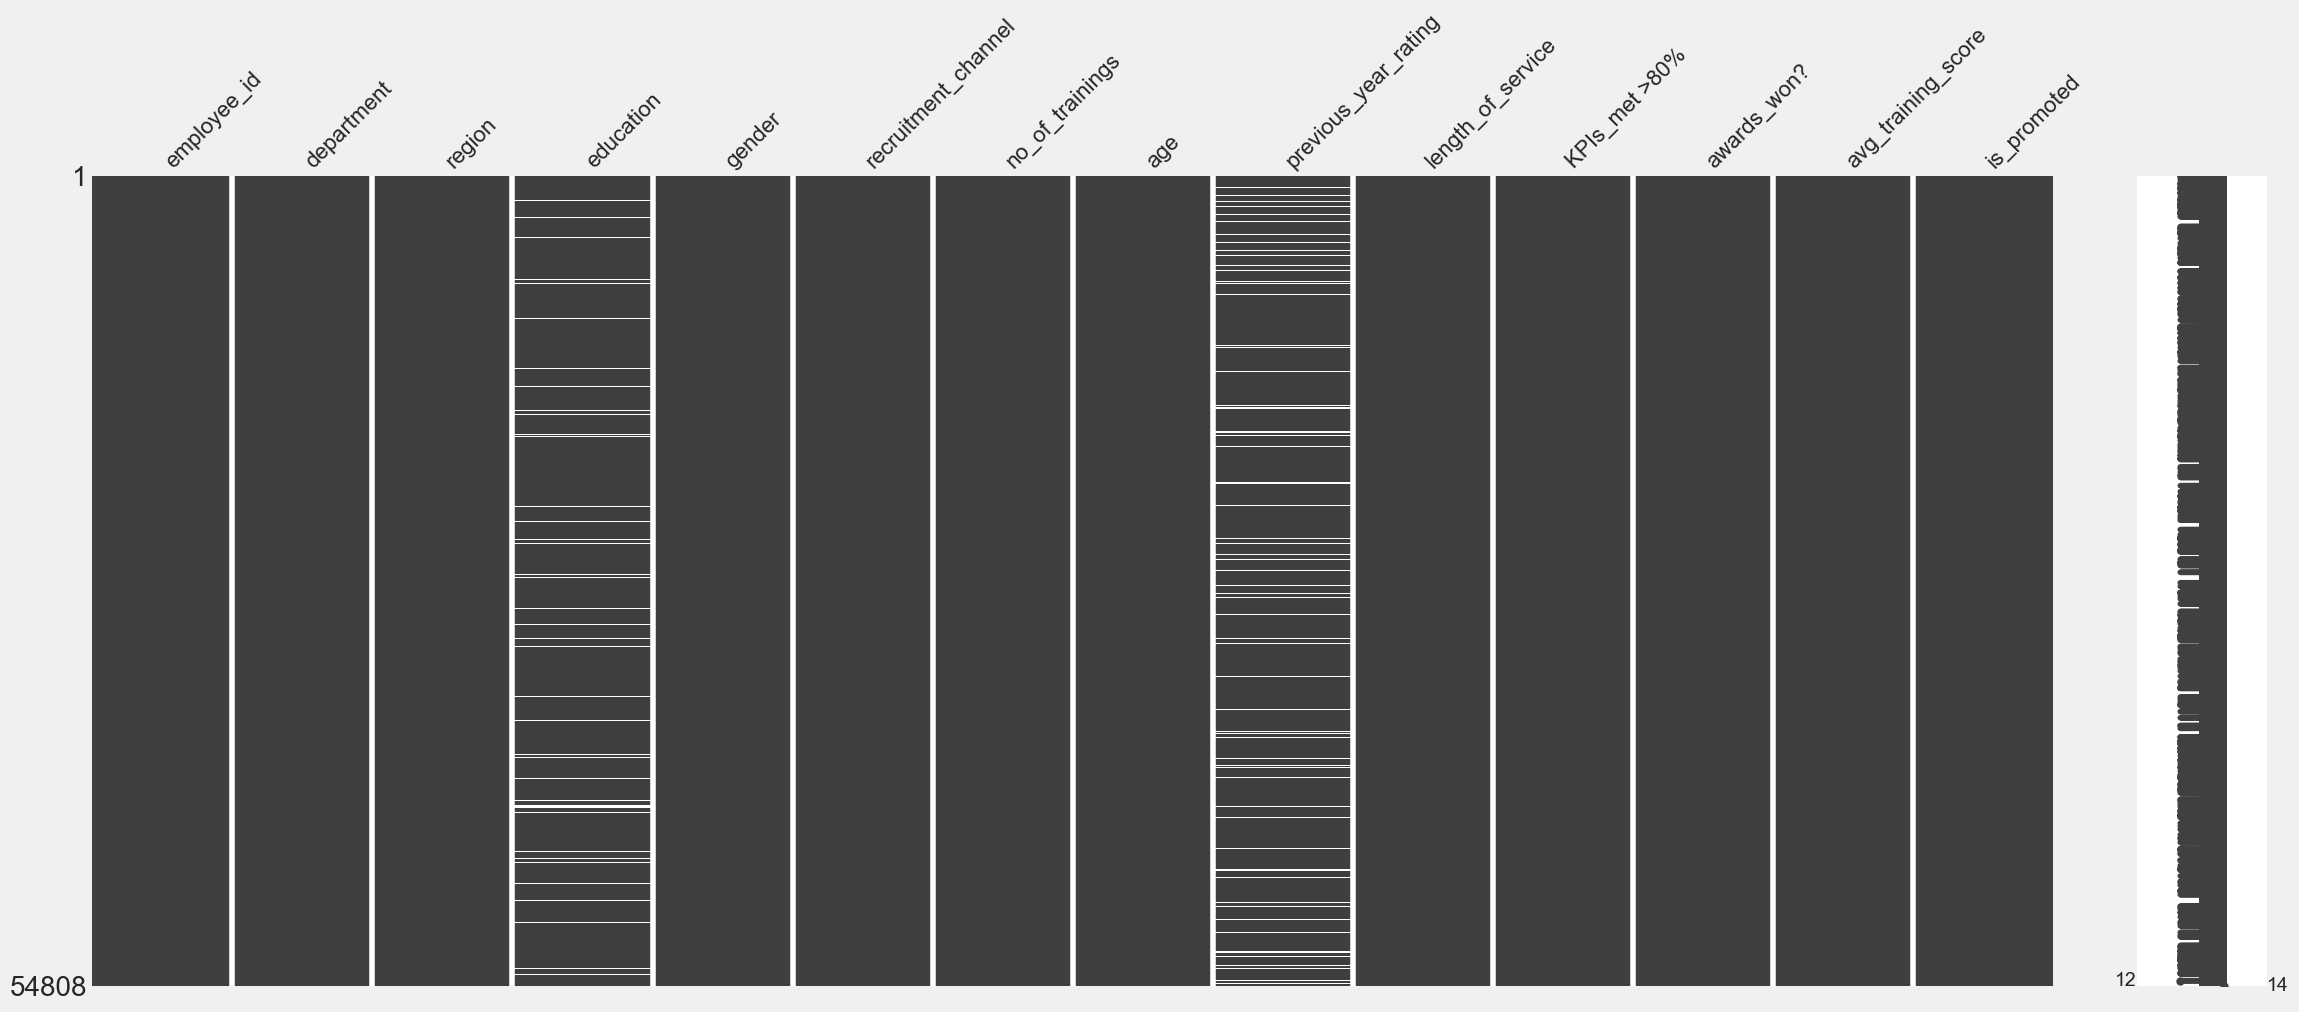

In [9]:
# Visualizing the null values using missingo function

import missingno as msno
msno.matrix(train)

In [10]:
test.shape

(23490, 13)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [12]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<Axes: >

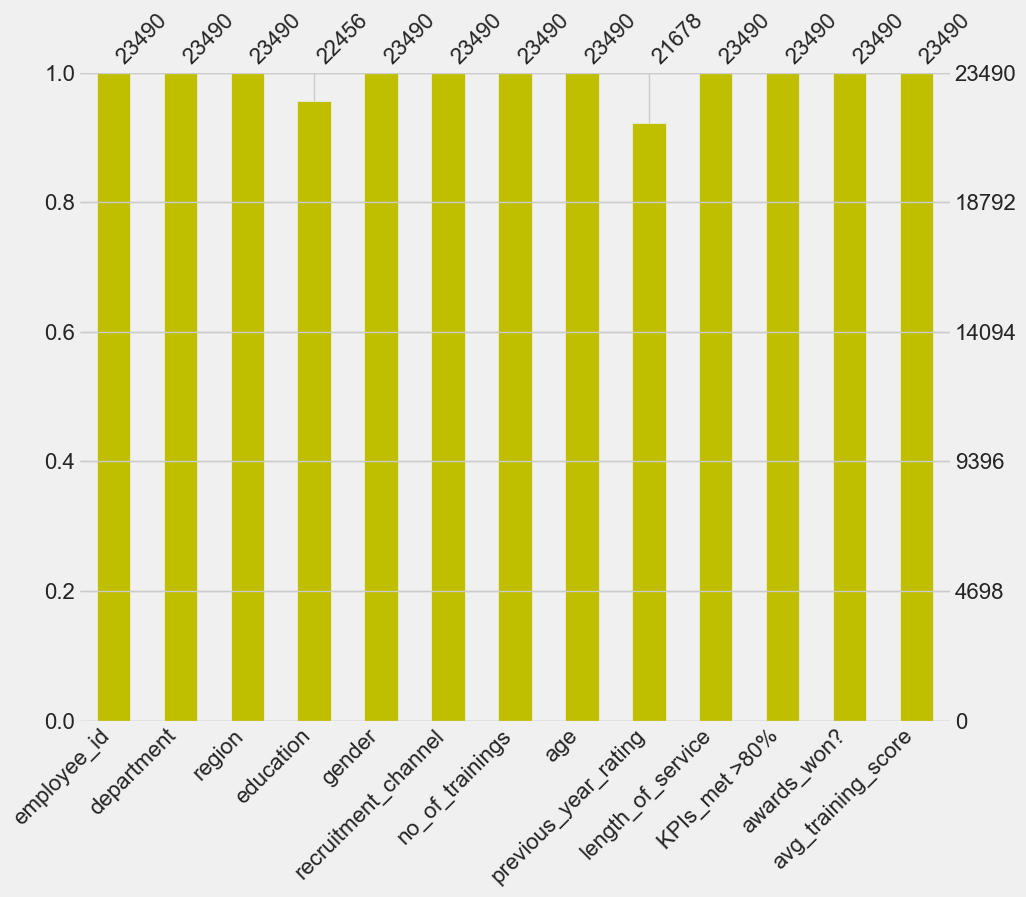

In [13]:
# Check the missing values in test data
msno.bar(test, color = 'y', figsize=(10,8))

## Exploratory Data Analysis 

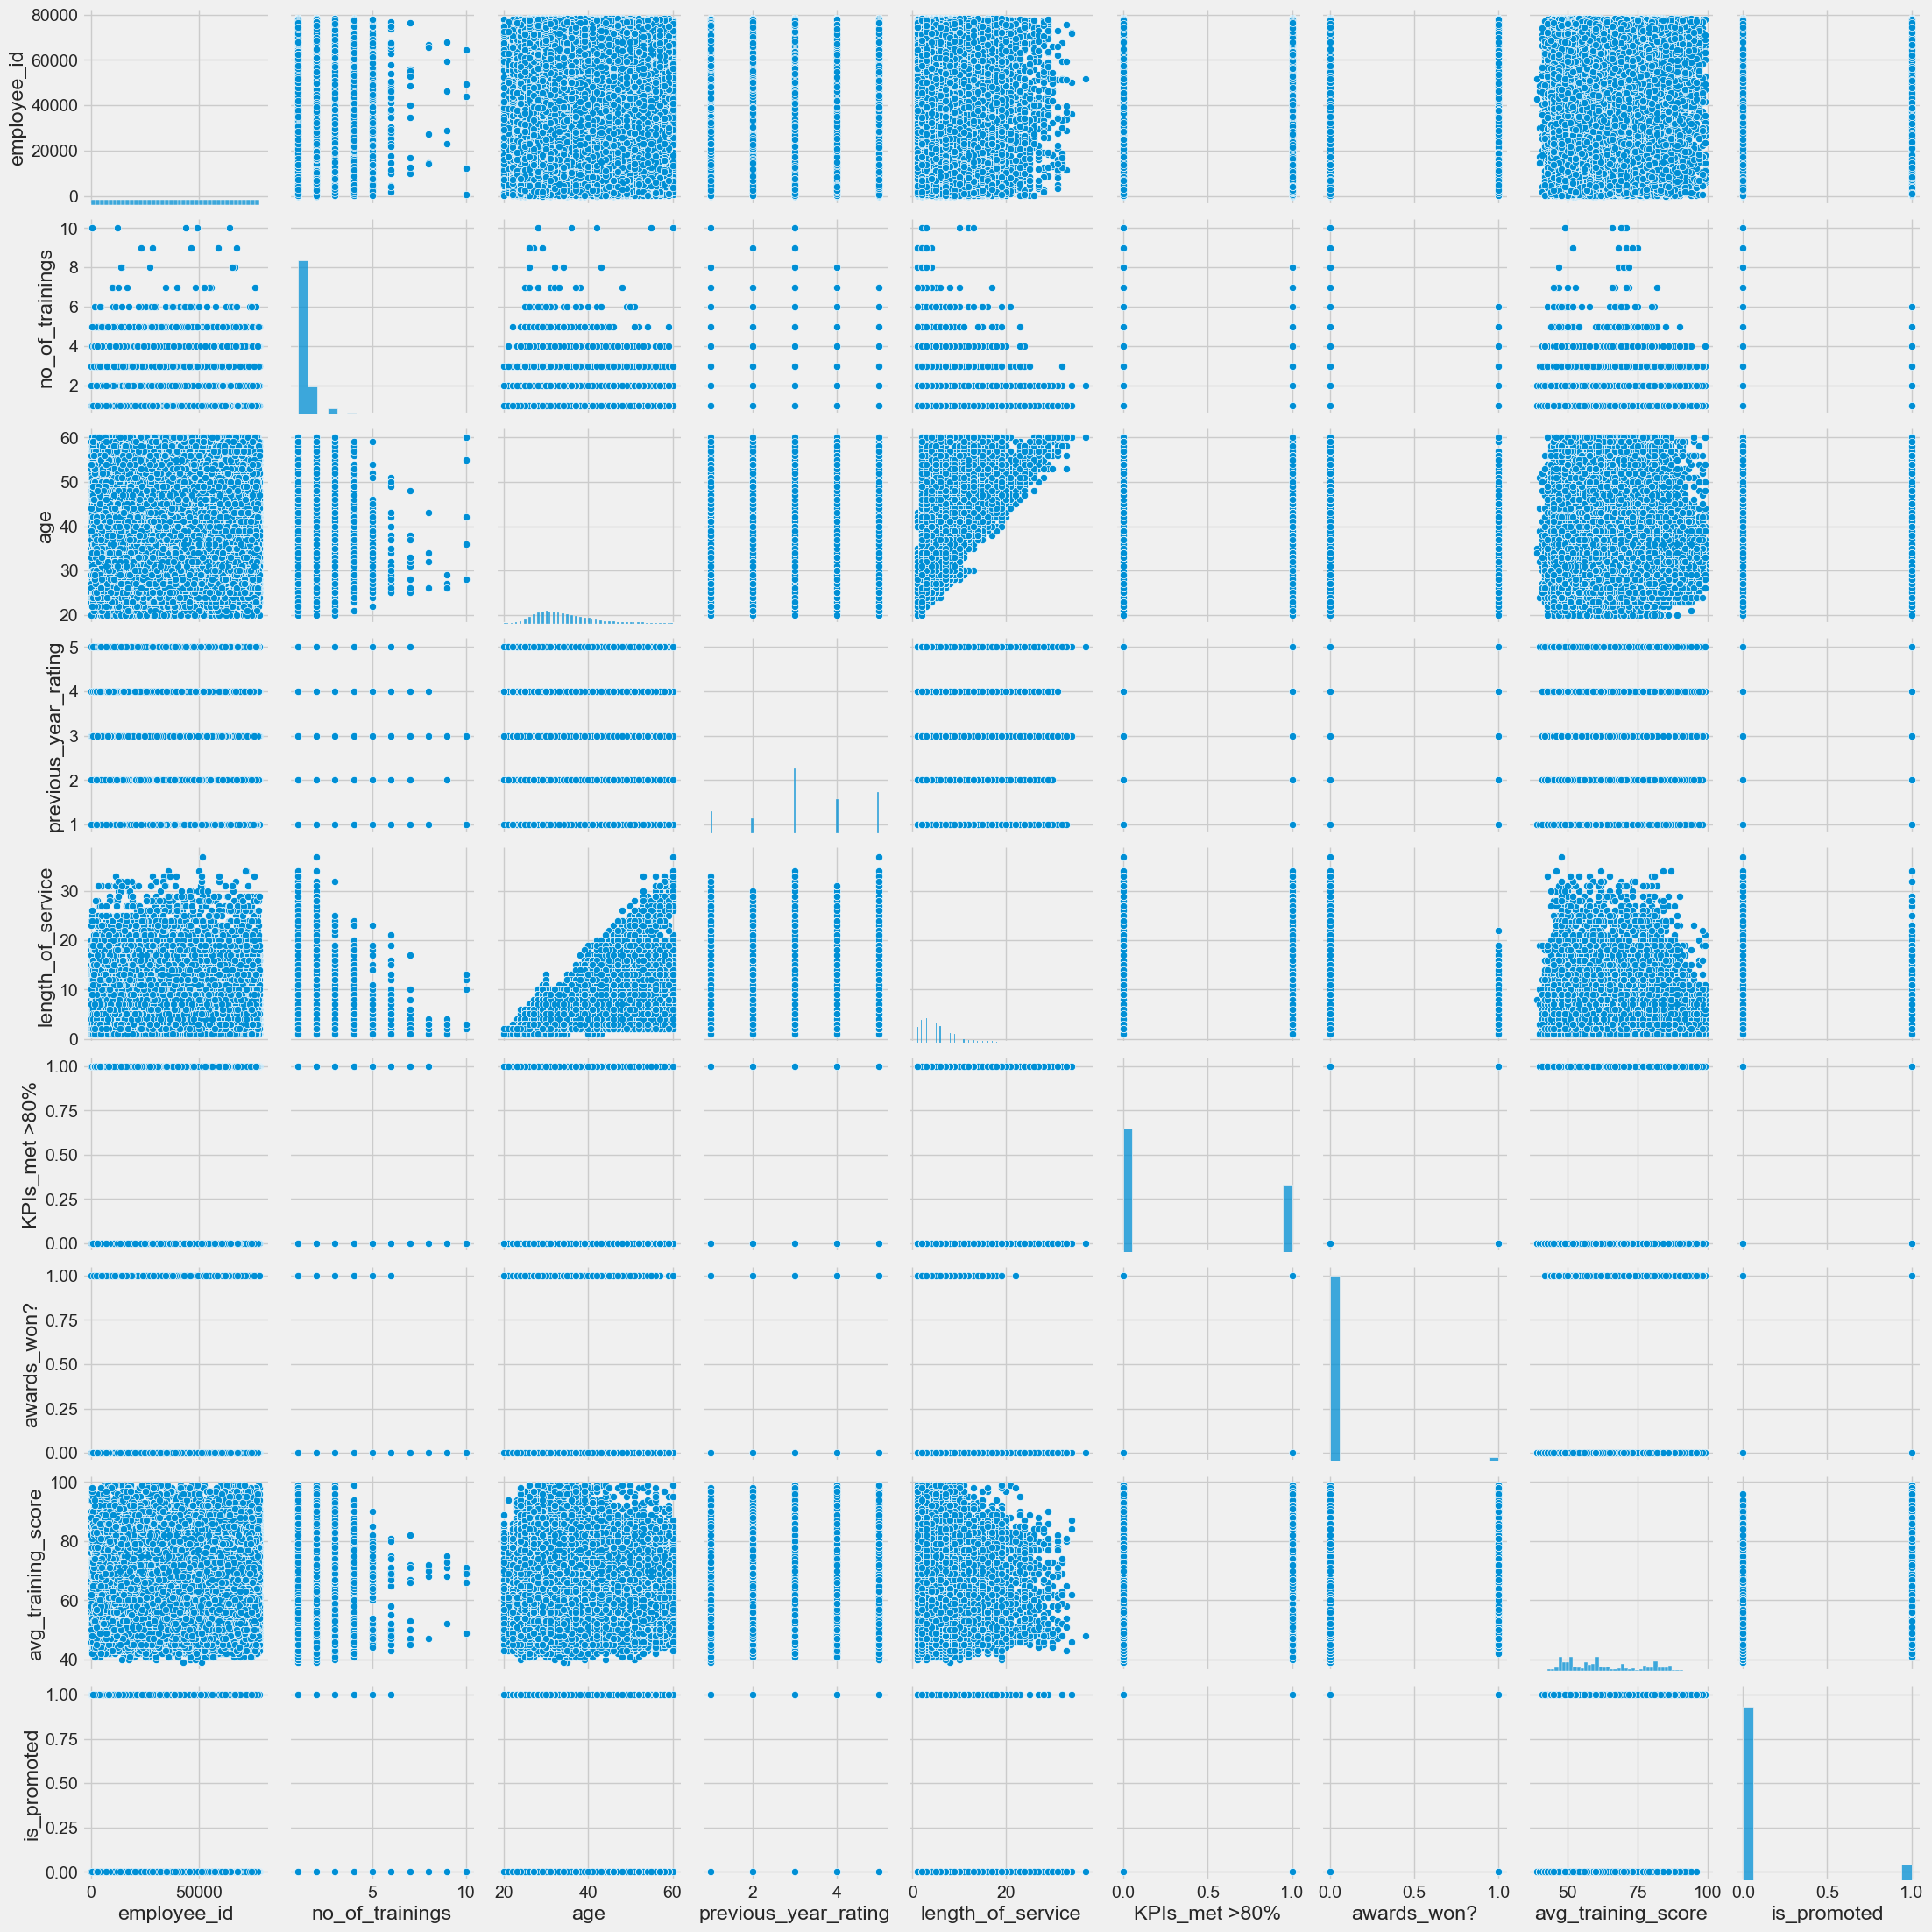

In [14]:
# Pairplot using seaborn library
sns.pairplot(train)

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>],
       [<Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>]], dtype=object)

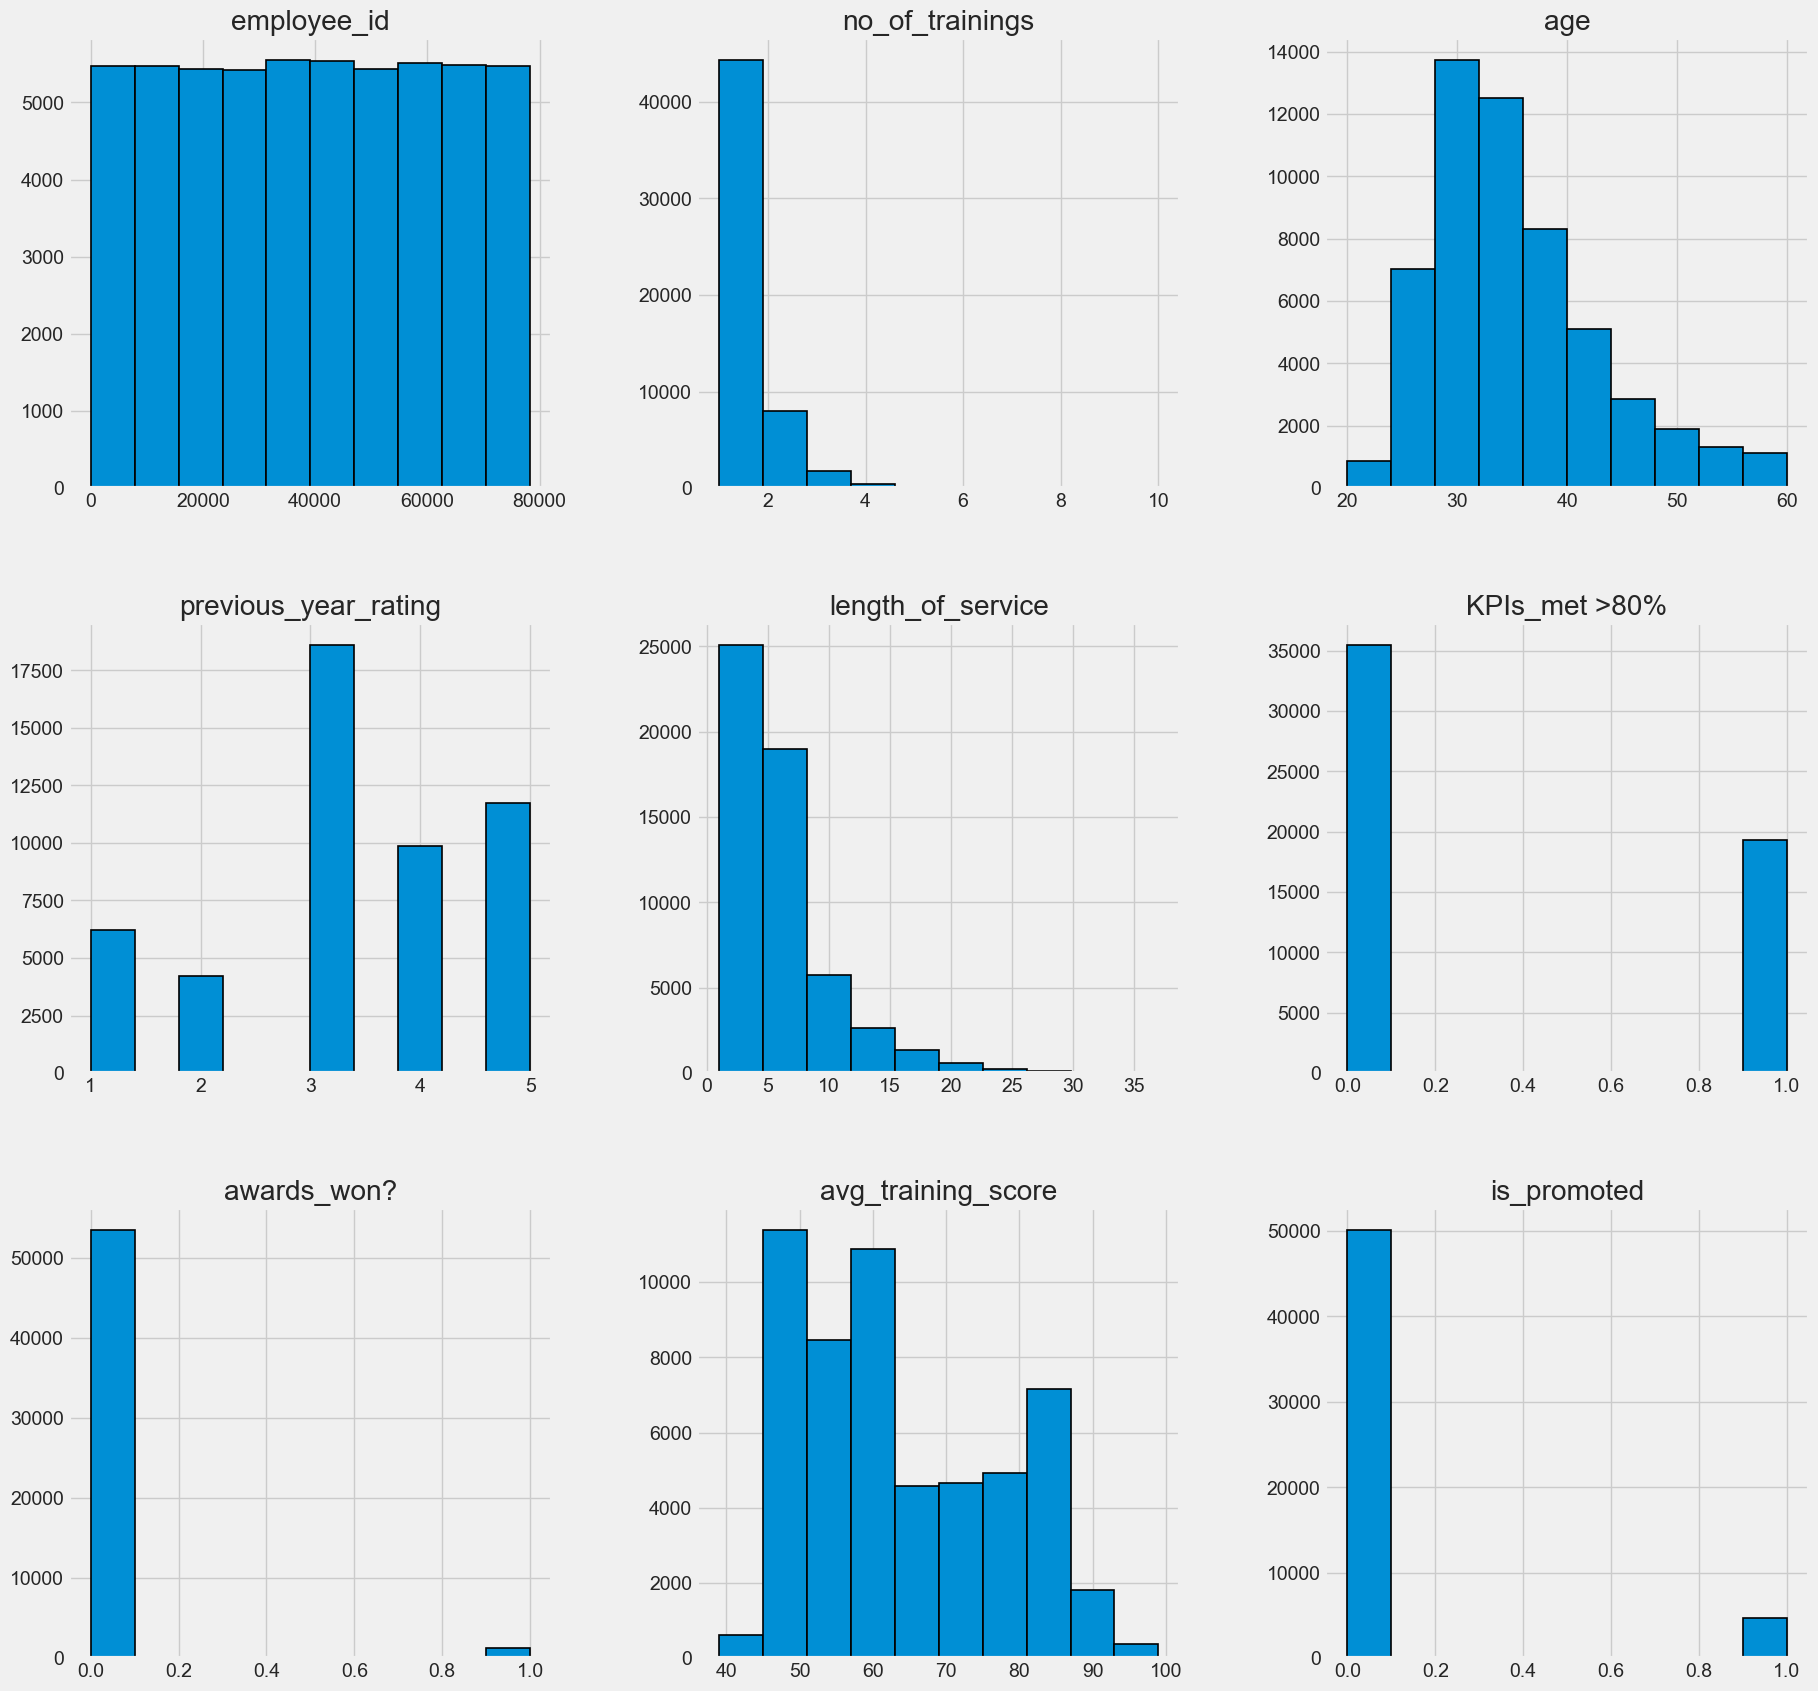

In [15]:
train.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [16]:
numeric_train = train.select_dtypes(include=[np.number]) # Select only numeric columns
numeric_train.corr() # Compute correlation on numeric columns

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


<Axes: >

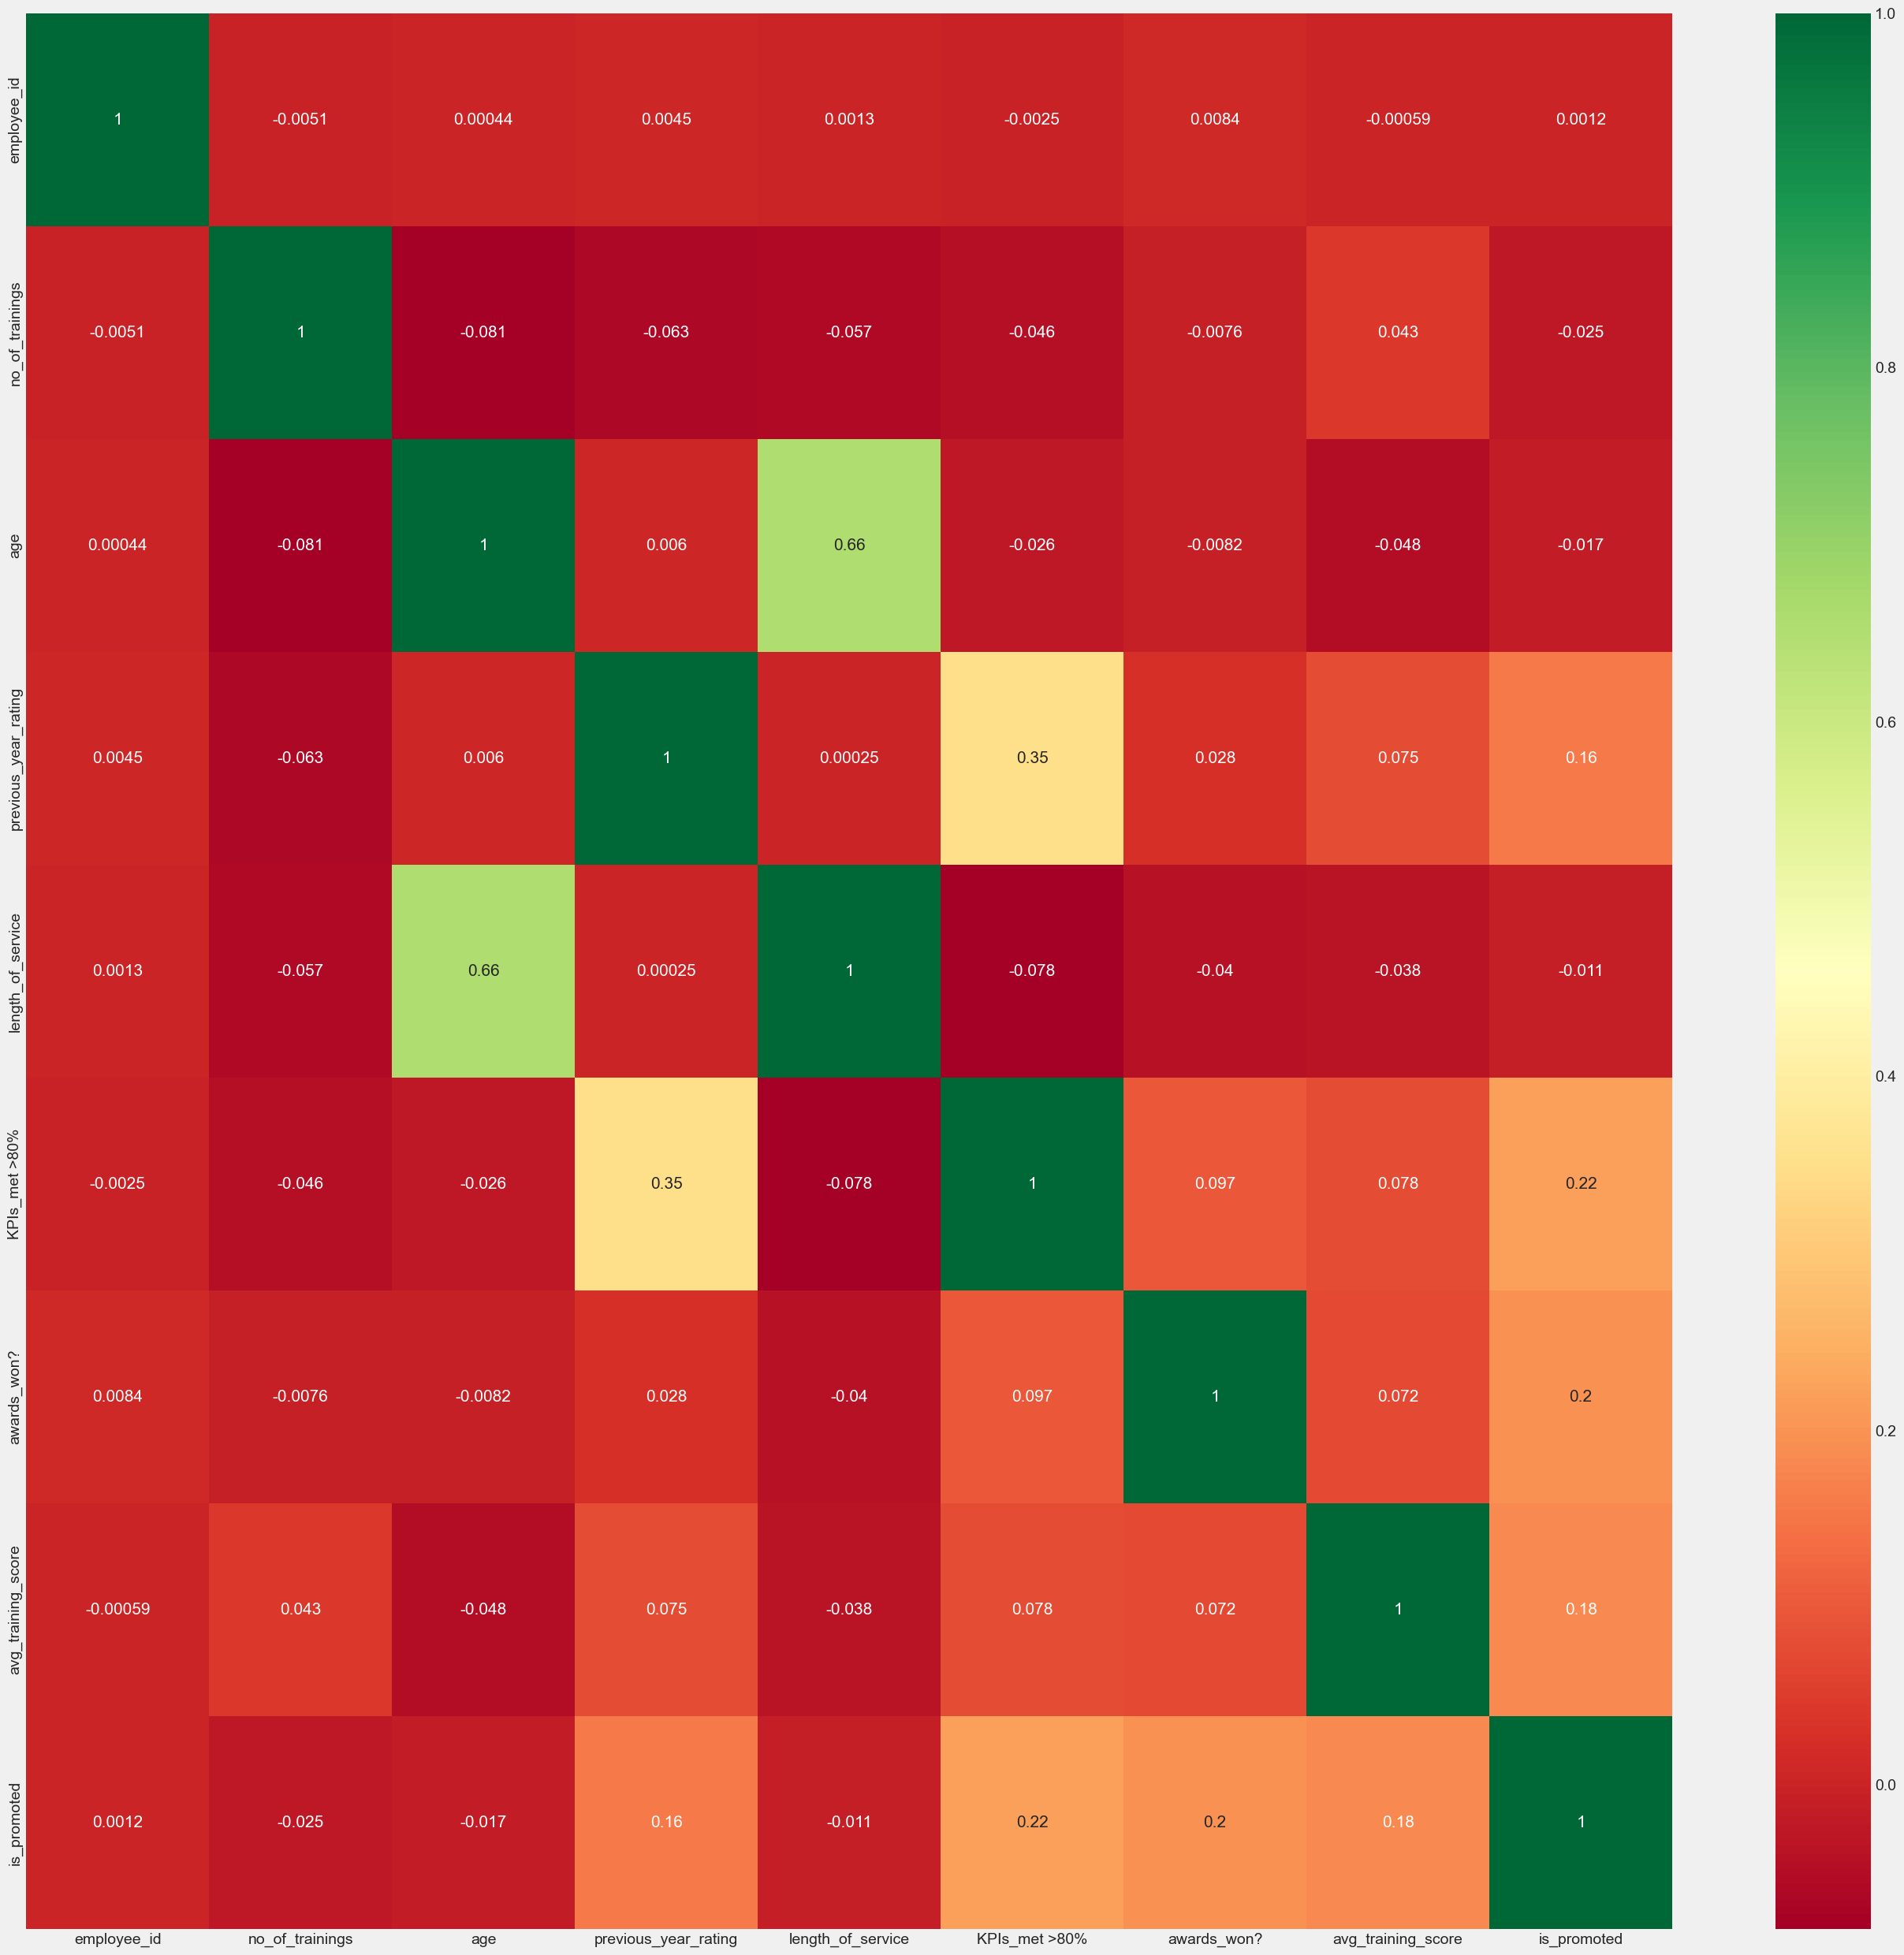

In [17]:
plt.figure(figsize=(30, 30))
sns.heatmap(numeric_train.corr(), annot = True, cmap = 'RdYlGn', annot_kws = {'size':15})

In [18]:
train['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

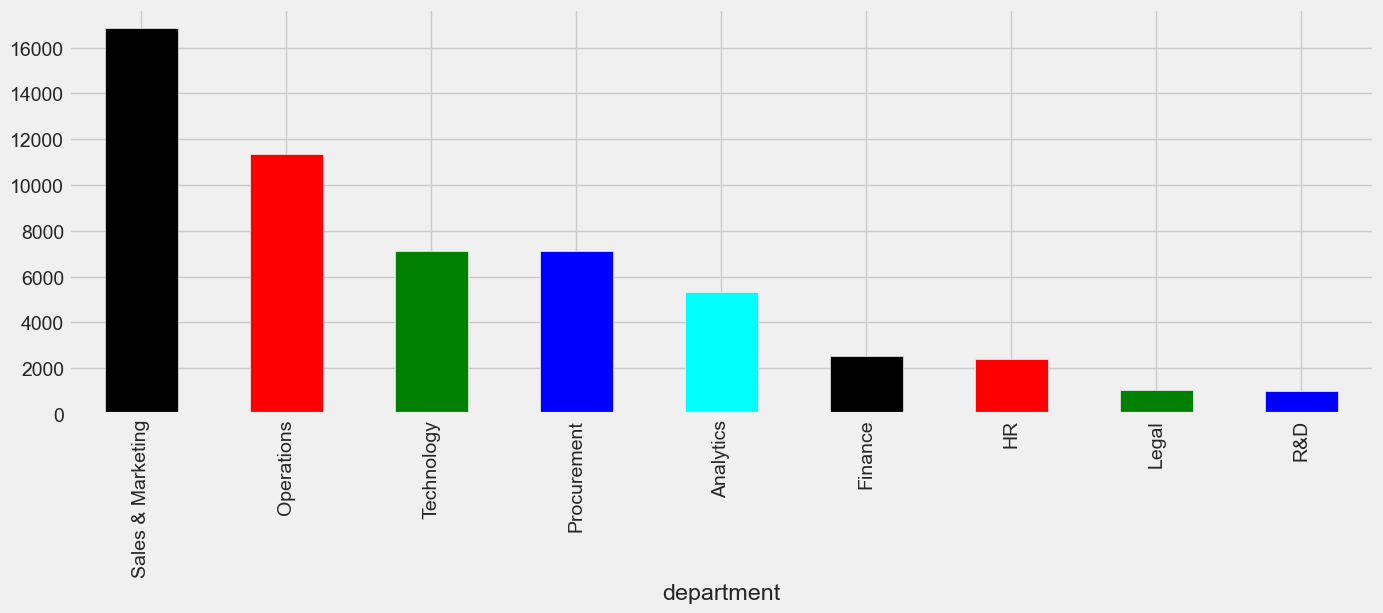

In [19]:
plt.subplots(figsize=(15, 5))
train['department'].value_counts(normalize = True)
train['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

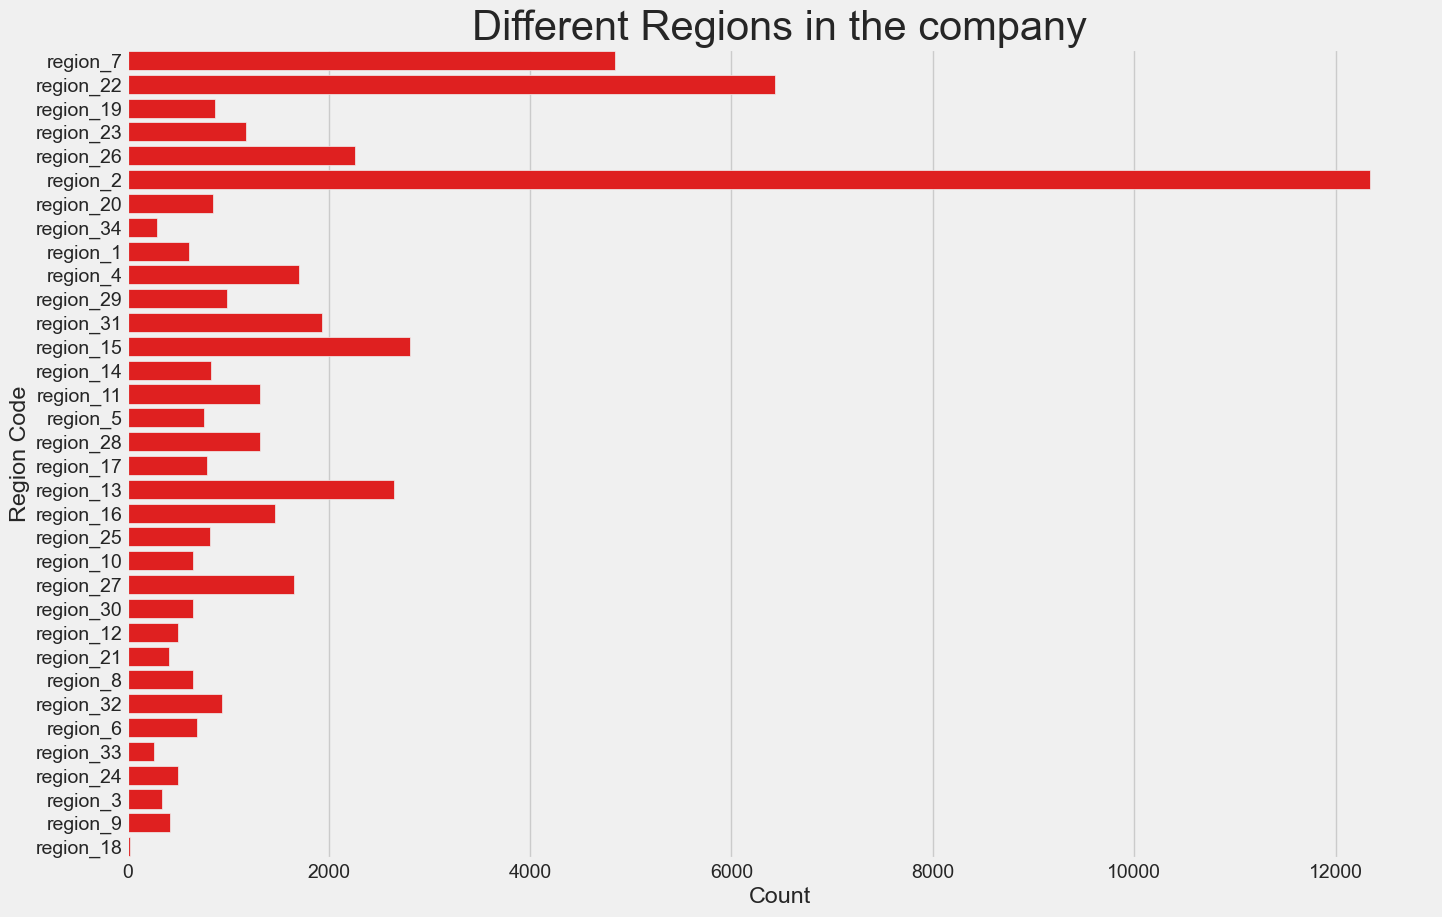

In [20]:
plt.subplots(figsize=(15, 10))
sns.countplot(train['region'], color = 'red')
plt.title('Different Regions in the company', fontsize = 30)
plt.xlabel('Count')
plt.ylabel('Region Code')
plt.show()

In [21]:
train['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

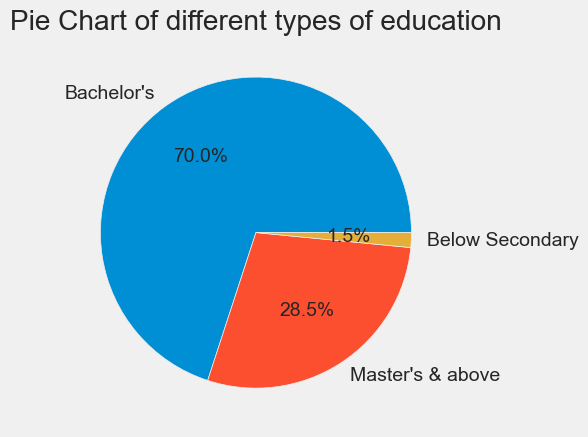

In [22]:
x = train['education'].value_counts()
y = train['education'].value_counts().index
plt.pie(x, labels = y, autopct="%1.1f%%")
plt.title("Pie Chart of different types of education")
plt.show()

In [23]:
x = train['gender'].value_counts()
y = train['gender'].value_counts().index
print(x)
print(y)

gender
m    38496
f    16312
Name: count, dtype: int64
Index(['m', 'f'], dtype='object', name='gender')


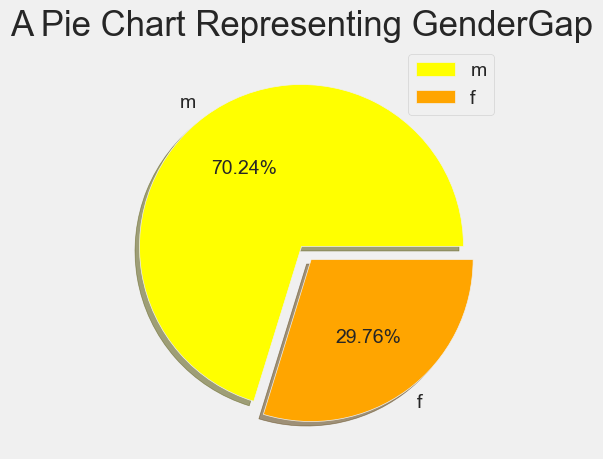

In [24]:
plt.figure(figsize=(5,5))
plt.pie(x, labels = y, colors = ['yellow','orange'], explode = [0, 0.1], shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 25)
plt.legend()
plt.show()

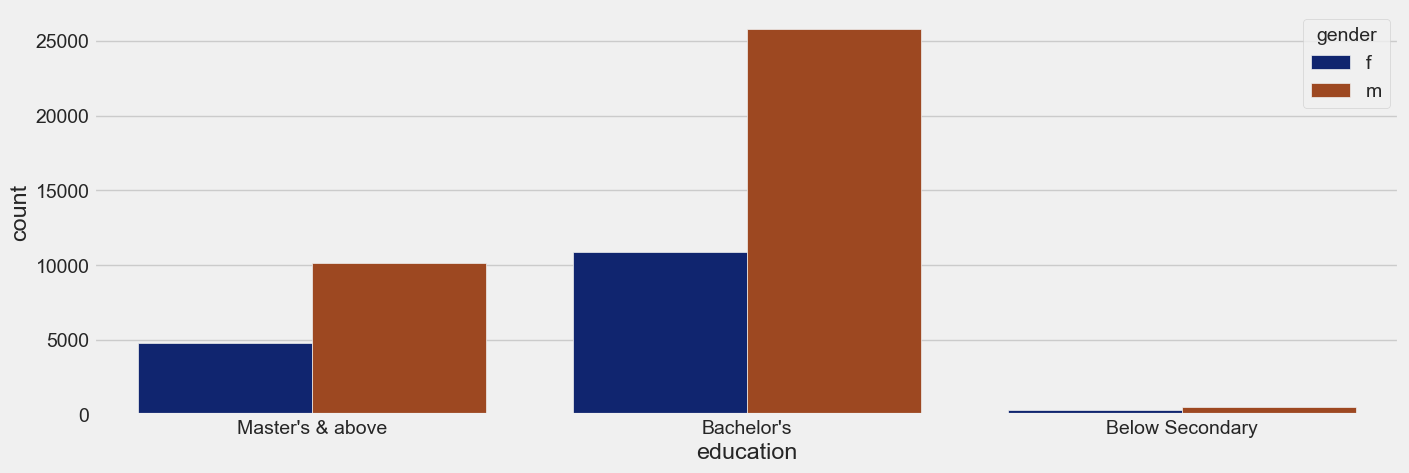

In [25]:
plt.subplots(figsize=(15, 5))
sns.countplot(x = 'education', data = train, hue = 'gender', palette = 'dark')
plt.show()

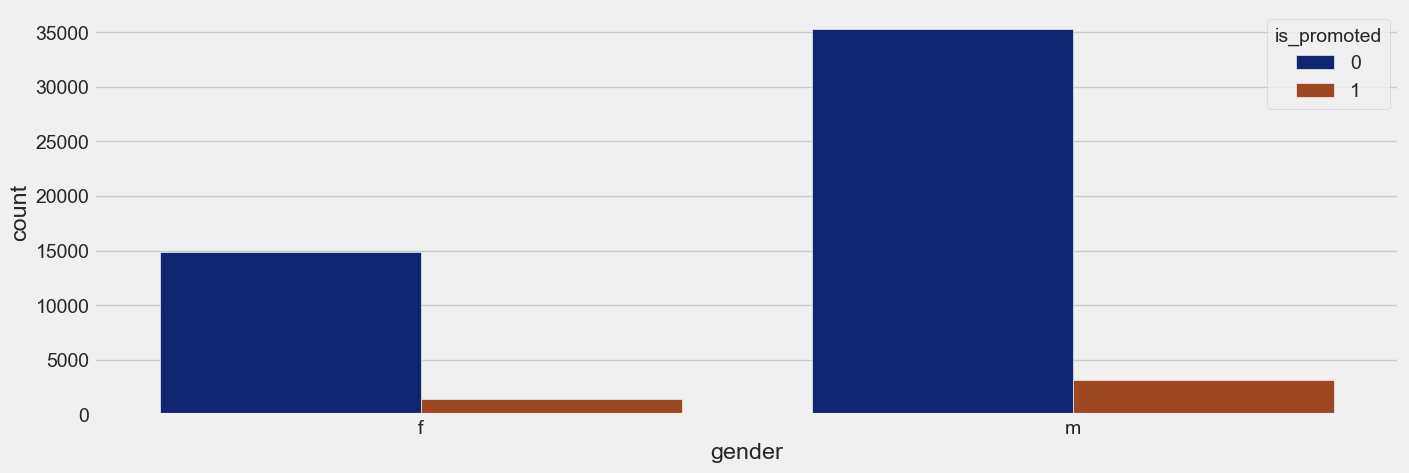

In [26]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'gender', data = train, hue = 'is_promoted', palette = 'dark')
plt.show()

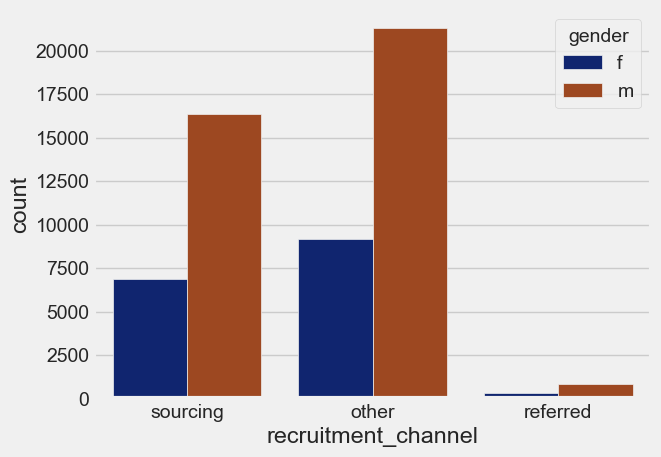

In [27]:
plt.subplots(figure=(15, 5))
sns.countplot(x = 'recruitment_channel', data = train, hue = 'gender', palette = 'dark')
plt.show()

In [28]:
train['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

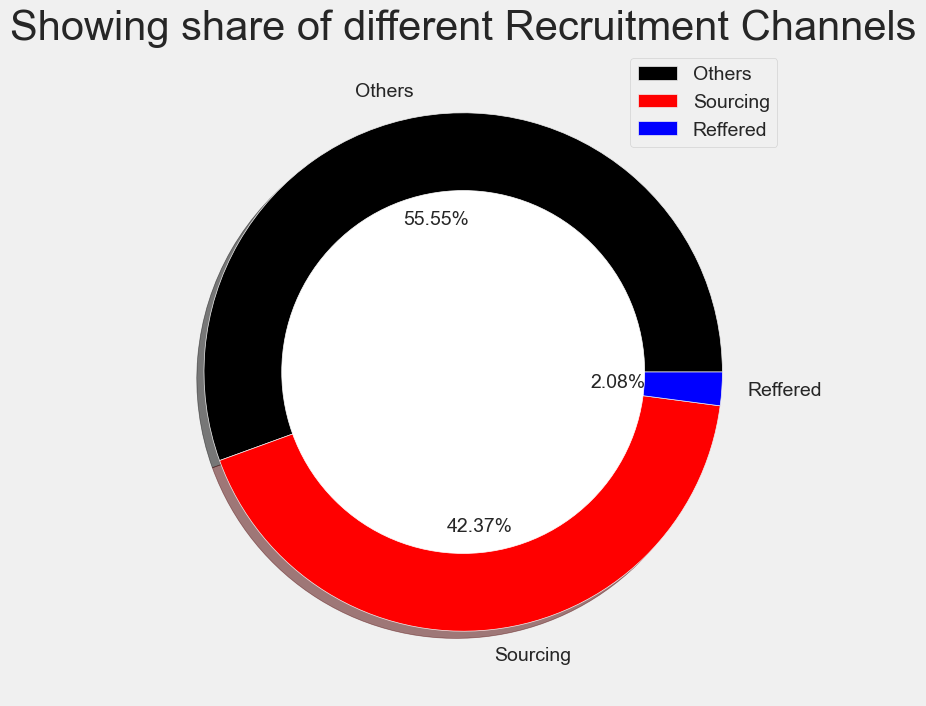

In [29]:
size = [30446, 23220, 1142]
colors = ['black', 'red', 'blue']
labels = 'Others', 'Sourcing', 'Reffered'

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.figure(figsize=(8,8))
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

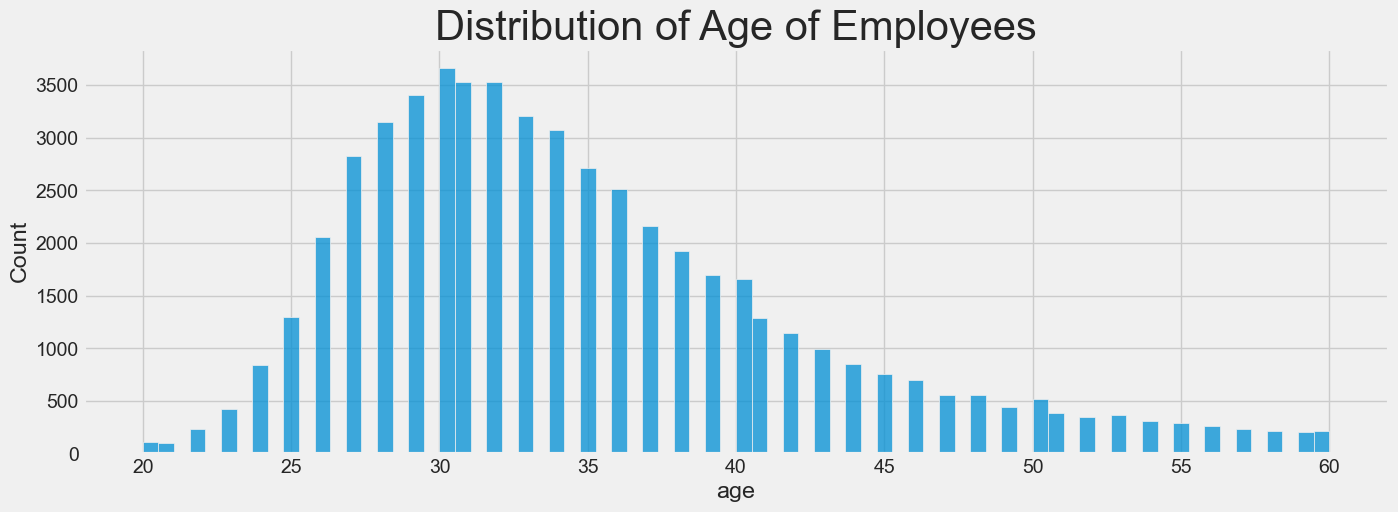

In [30]:
plt.subplots(figsize = (15, 5))
sns.histplot(train['age'])
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.show()

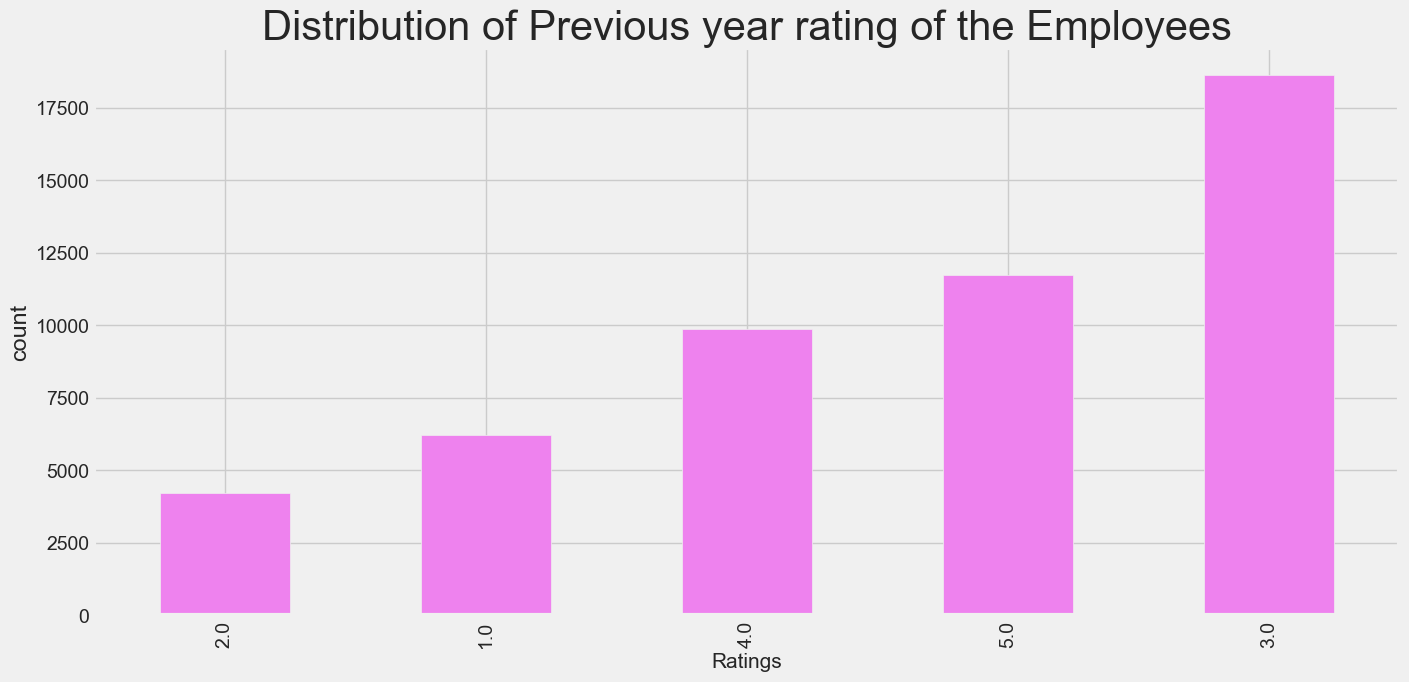

In [31]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize=(15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

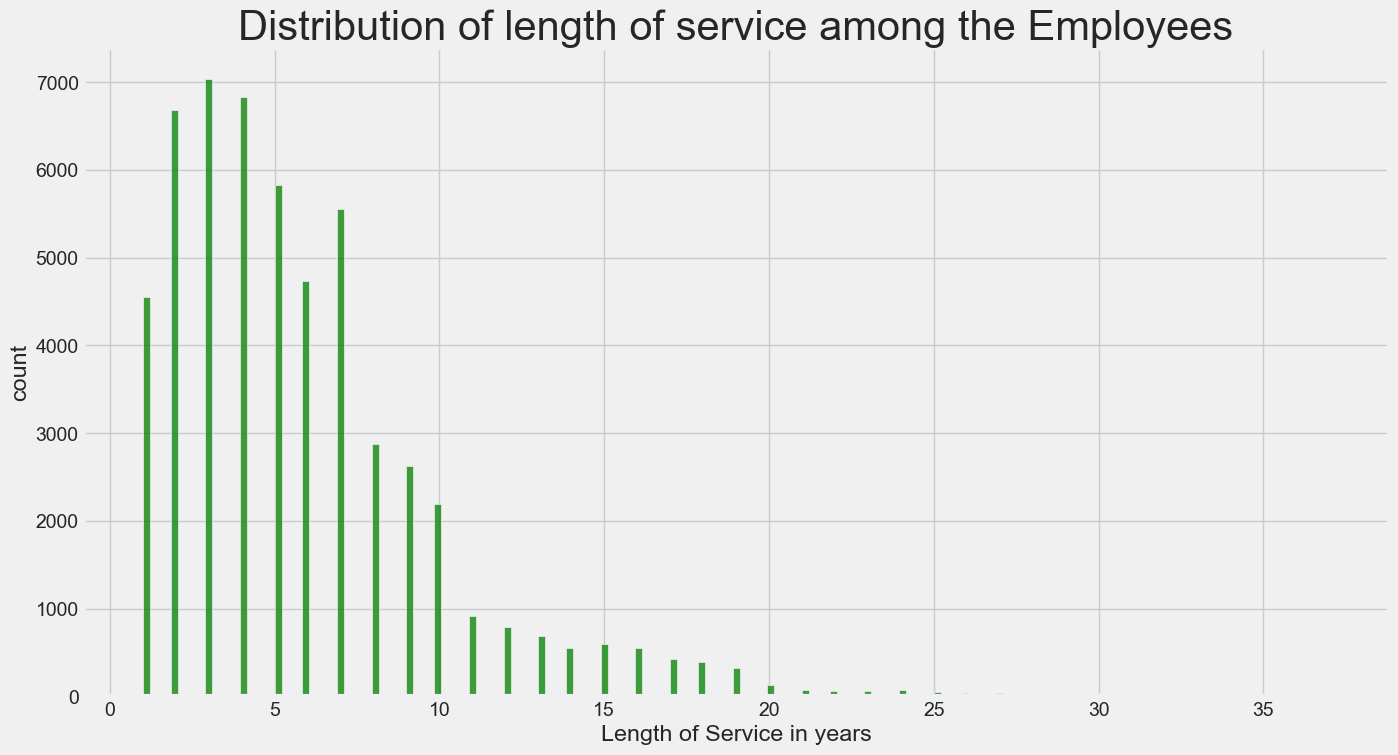

In [32]:
plt.subplots(figsize=(15, 8))
sns.histplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years')
plt.ylabel('count')
plt.show()

In [33]:
train['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

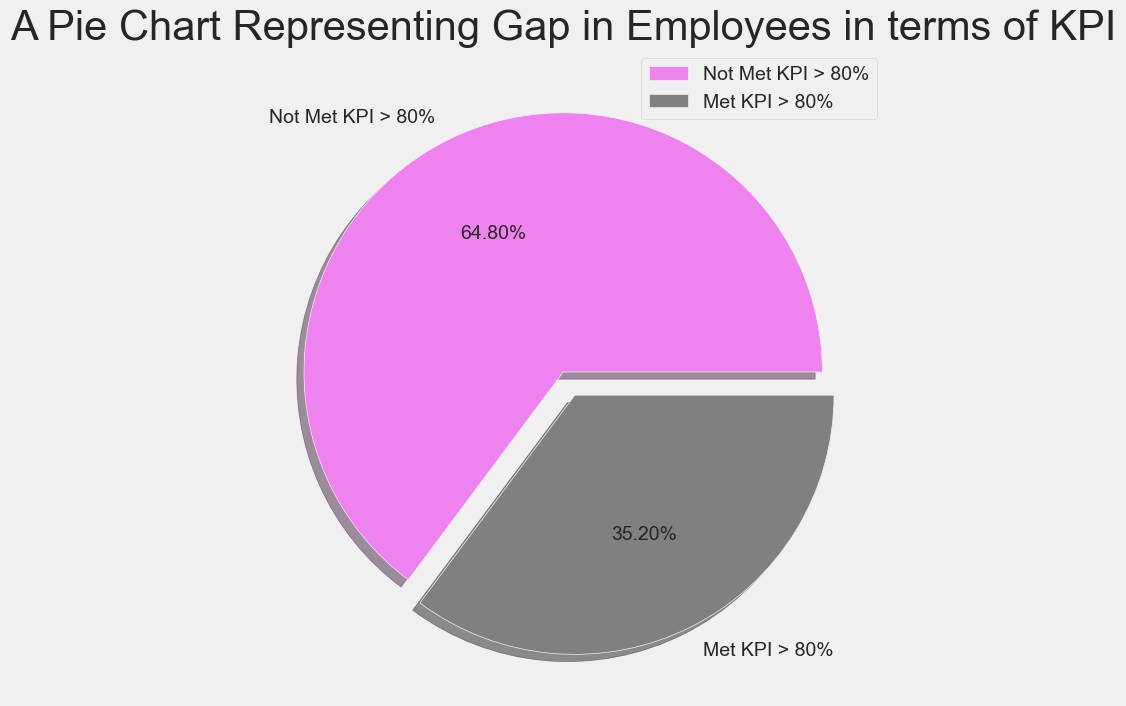

In [34]:
size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.figure(figsize=(8, 8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.legend()
plt.show()

In [35]:
train['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

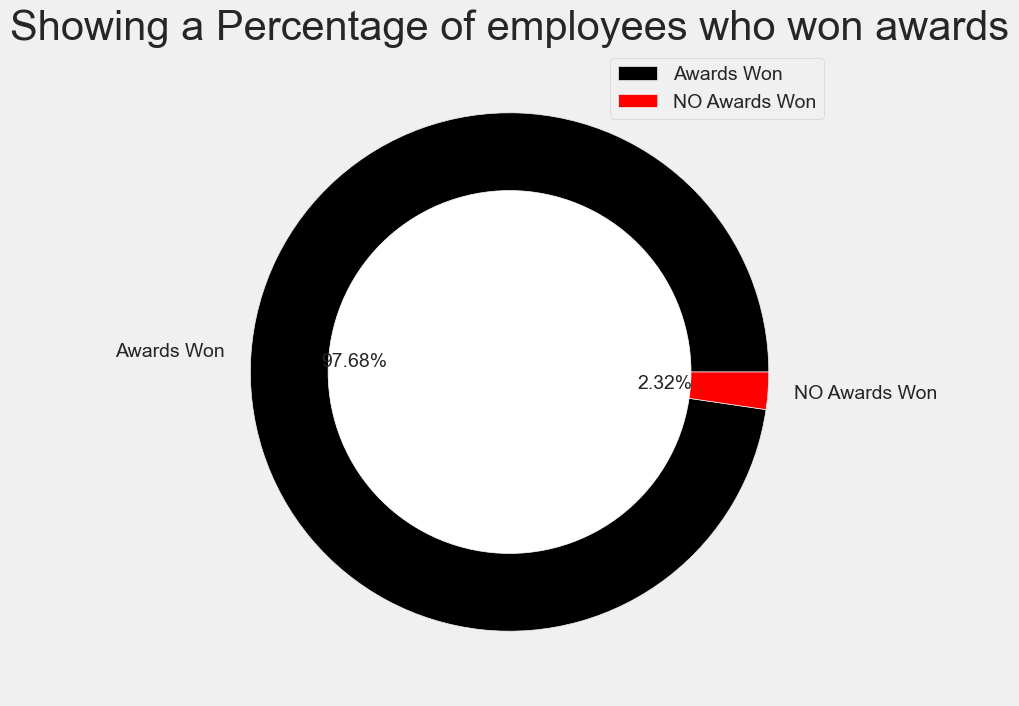

In [36]:
size = [53538, 1270]
colors = ['black', 'red']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.figure(figsize=(8, 8))
plt.pie(size, labels = labels, colors = colors, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

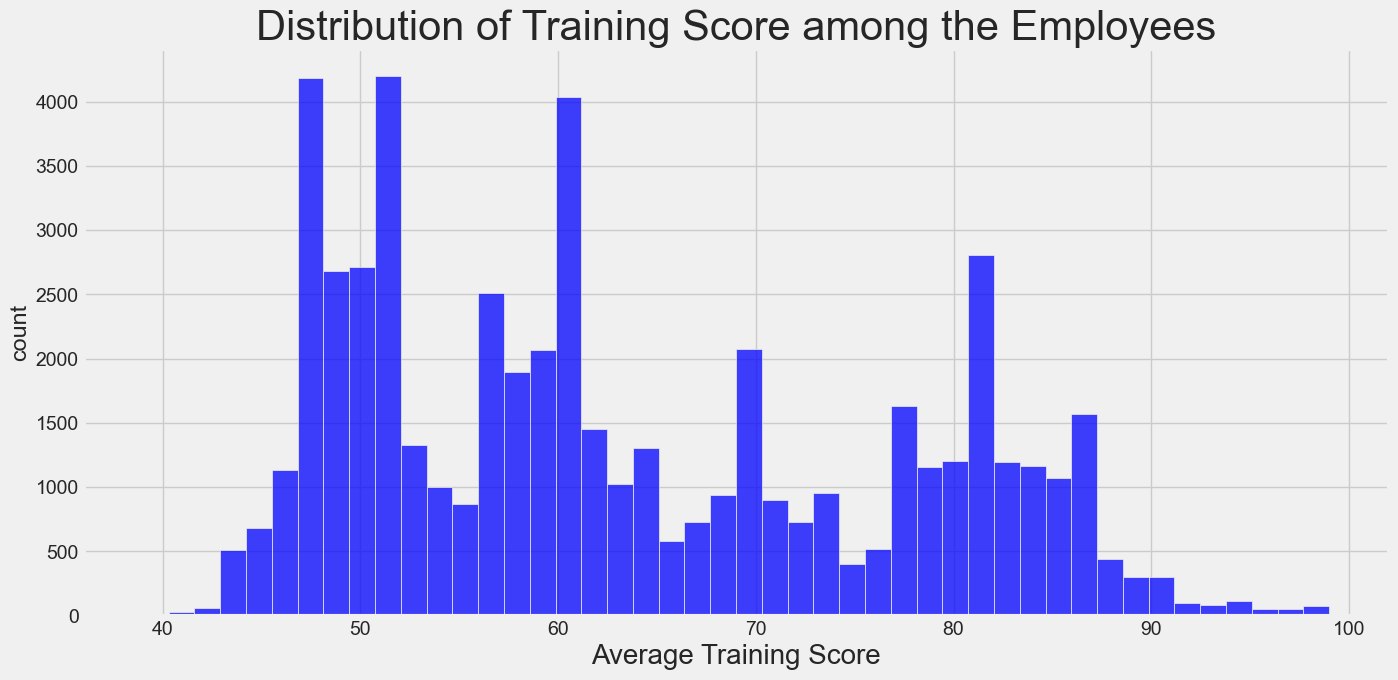

In [37]:
plt.subplots(figsize=(15,7))
sns.histplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [38]:
train['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [39]:
promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


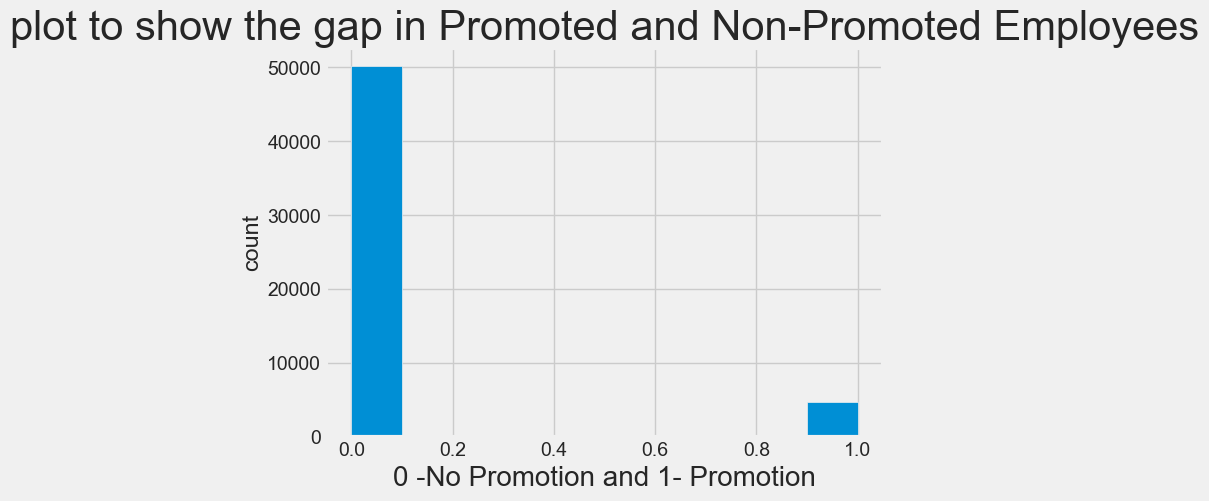

In [40]:
plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

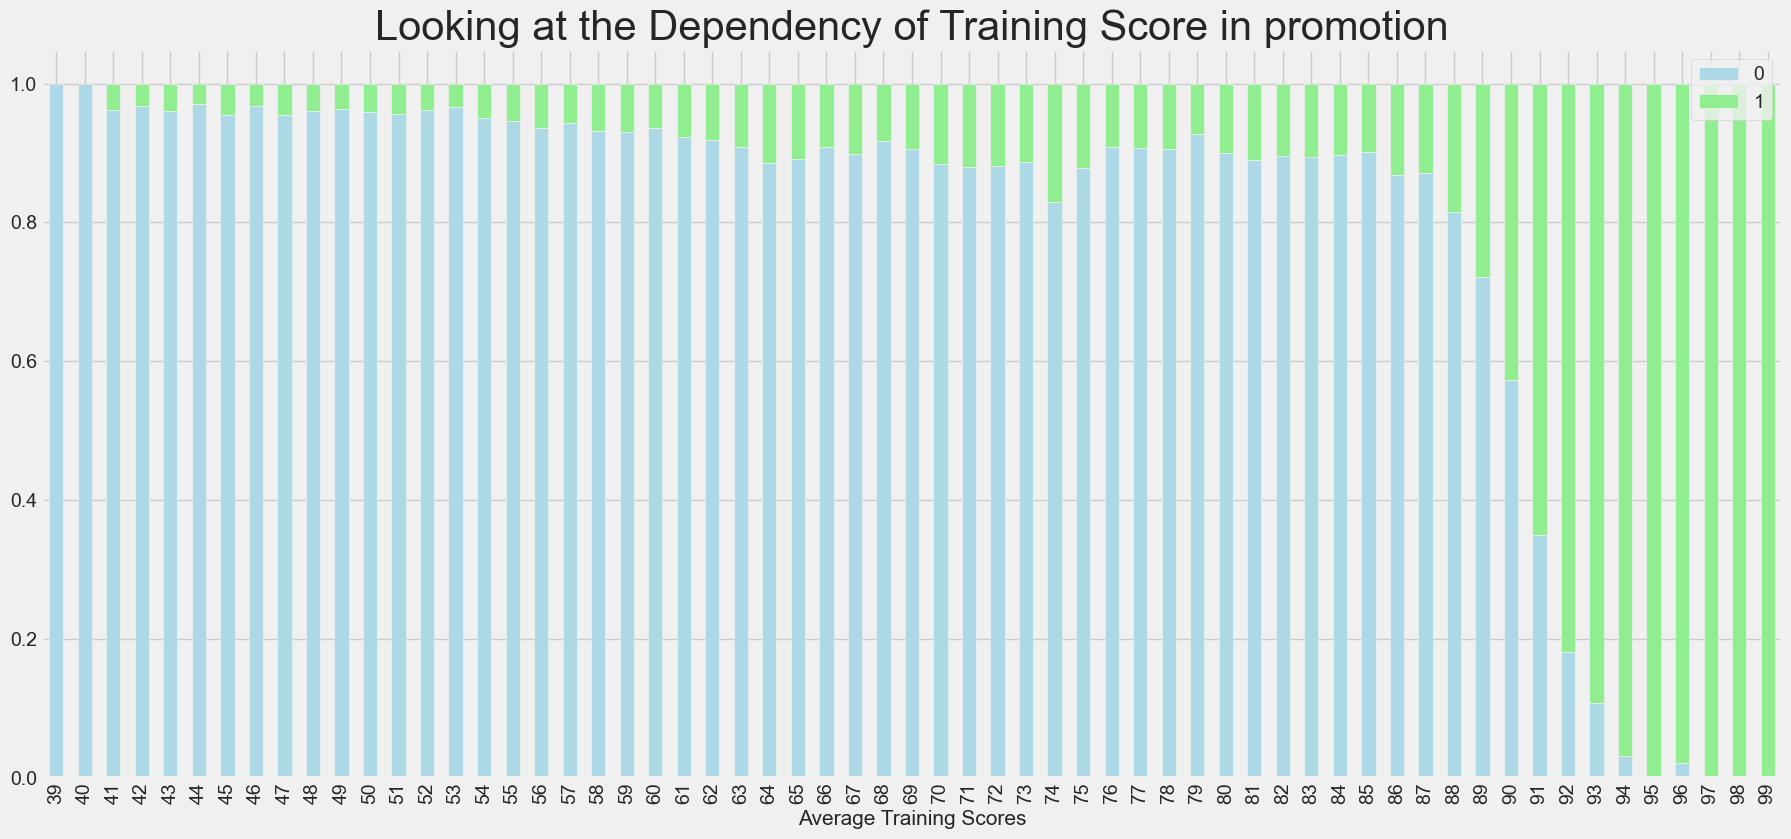

In [41]:
data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['lightblue', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.

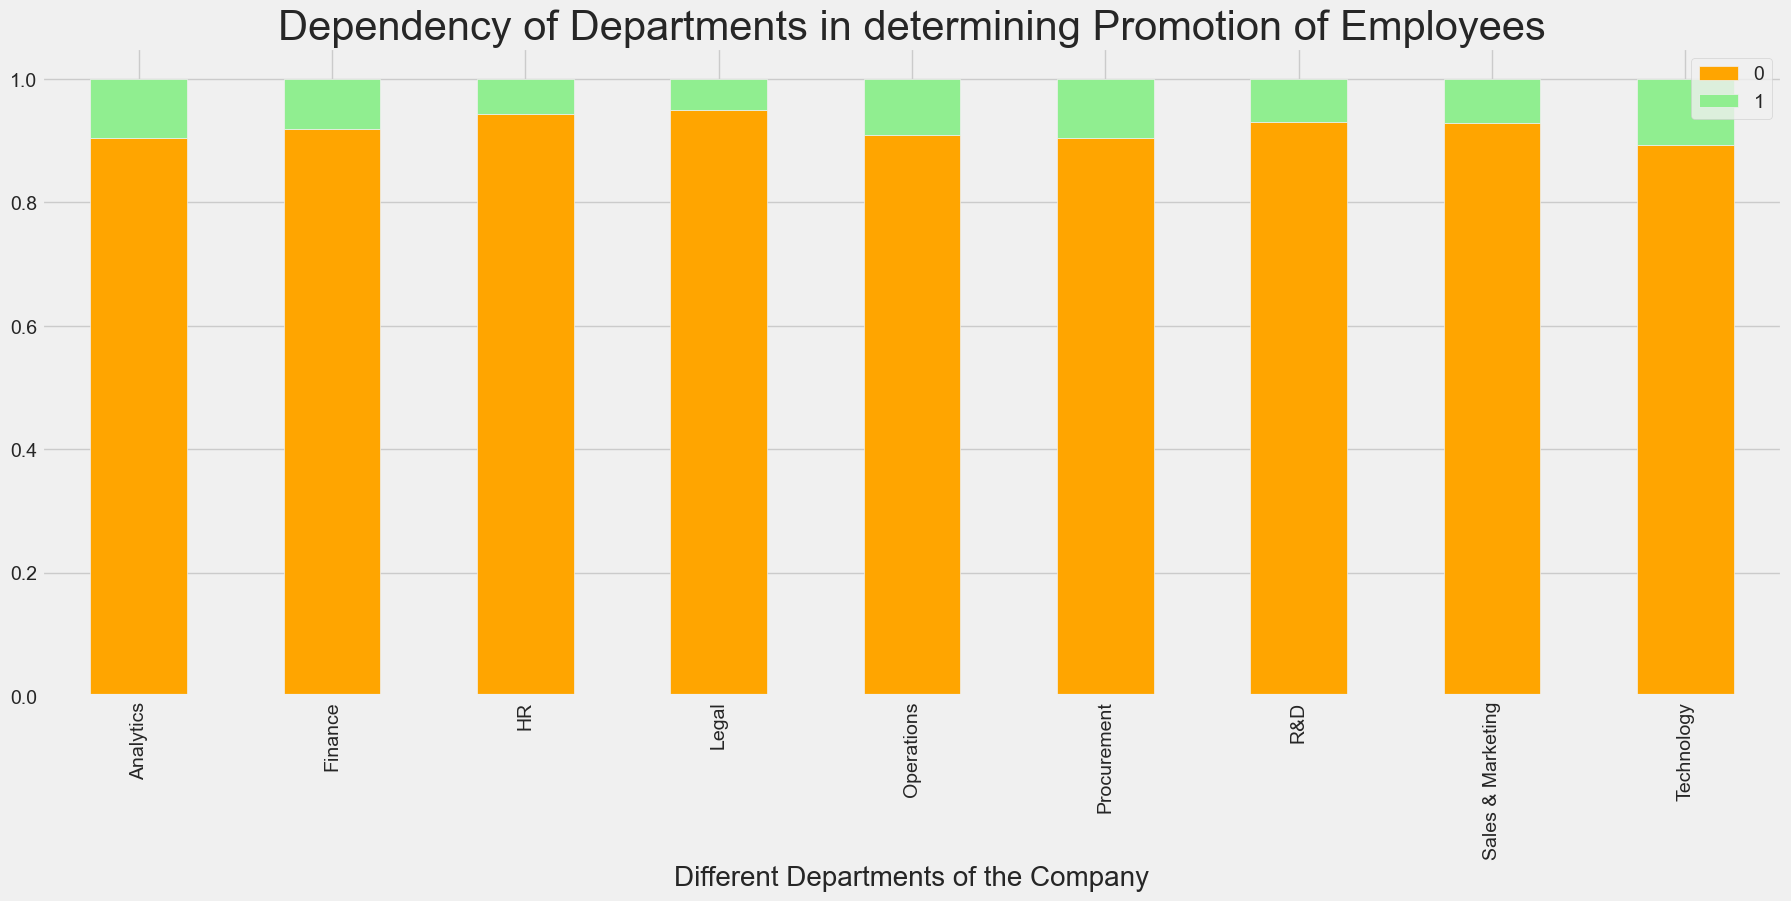

In [42]:
data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

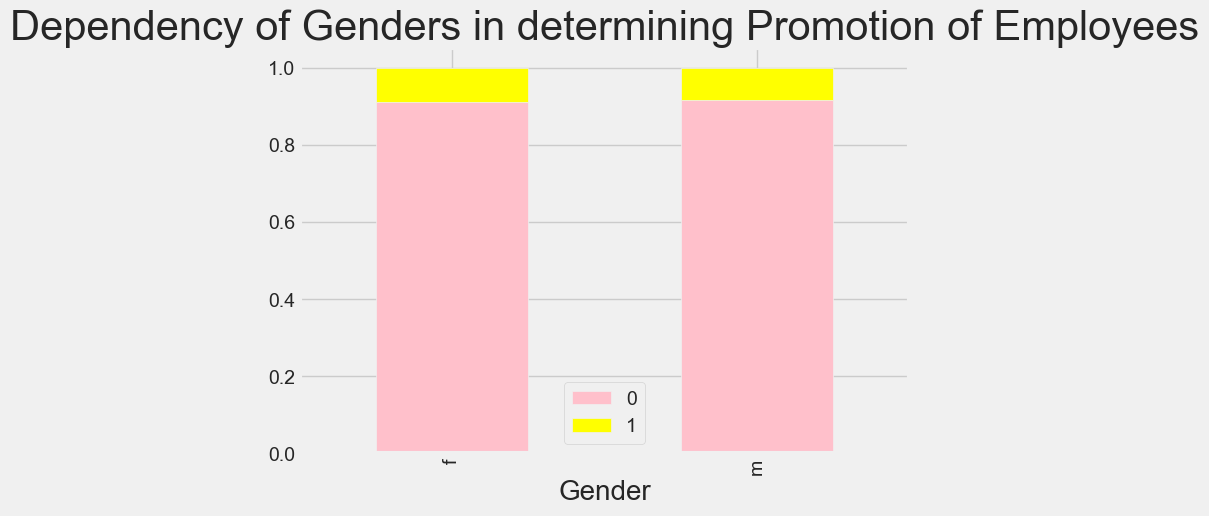

In [43]:
data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()

The above plot shows that there is no partiality between males and females in terms of promotion

## Data Pre-processing

In [44]:
train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)
train.isnull().sum().sum()

0

In [45]:
train = train.drop(['employee_id'], axis = 1)
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [46]:
x_test = test
x_test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [47]:
x_test = pd.get_dummies(x_test)
x_test.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [48]:
x = train.iloc[:, :-1]
y = train.iloc[:, -1]
print(x)
print(y)
print('Shape of x',x.shape)
print('Shape of y',y.shape)

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9        Bachelor's      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2           

In [49]:
x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

## Model Building 

In [50]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [51]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_test = x_test.drop(columns=['employee_id'])
#x_valid = x_valid.drop(columns=['employee_id'])

x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

C:\Users\subas\Downloads\anaconda\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\subas\Downloads\anaconda\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

C:\Users\subas\Downloads\anaconda\lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy : 0.9998130235341045


## XGBoost CLassifier 

In [55]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))

Training Accuracy : 0.9619689868368568


## Light Gradient Boosting Classifier

In [56]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))

C:\Users\subas\Downloads\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\subas\Downloads\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Info] Number of positive: 40065, number of negative: 40159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 80224, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499414 -> initscore=-0.002343
[LightGBM] [Info] Start training from score -0.002343
Training Accuracy : 0.9563970881531711


## Extra Trees Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

#etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))

C:\Users\subas\Downloads\anaconda\lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy : 0.9998130235341045
